**Bibliotecas para a ResNet50**

In [86]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

**Preparando o Bando de Dados**

In [87]:
import pathlib
from google.colab import drive
drive.mount('/content/drive')
data_dir = "drive/My Drive/folhas_de_cafe"
data_dir = pathlib.Path(data_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
print(data_dir)

drive/My Drive/folhas_de_cafe


drive/My Drive/folhas_de_cafe/rust/1601.jpg


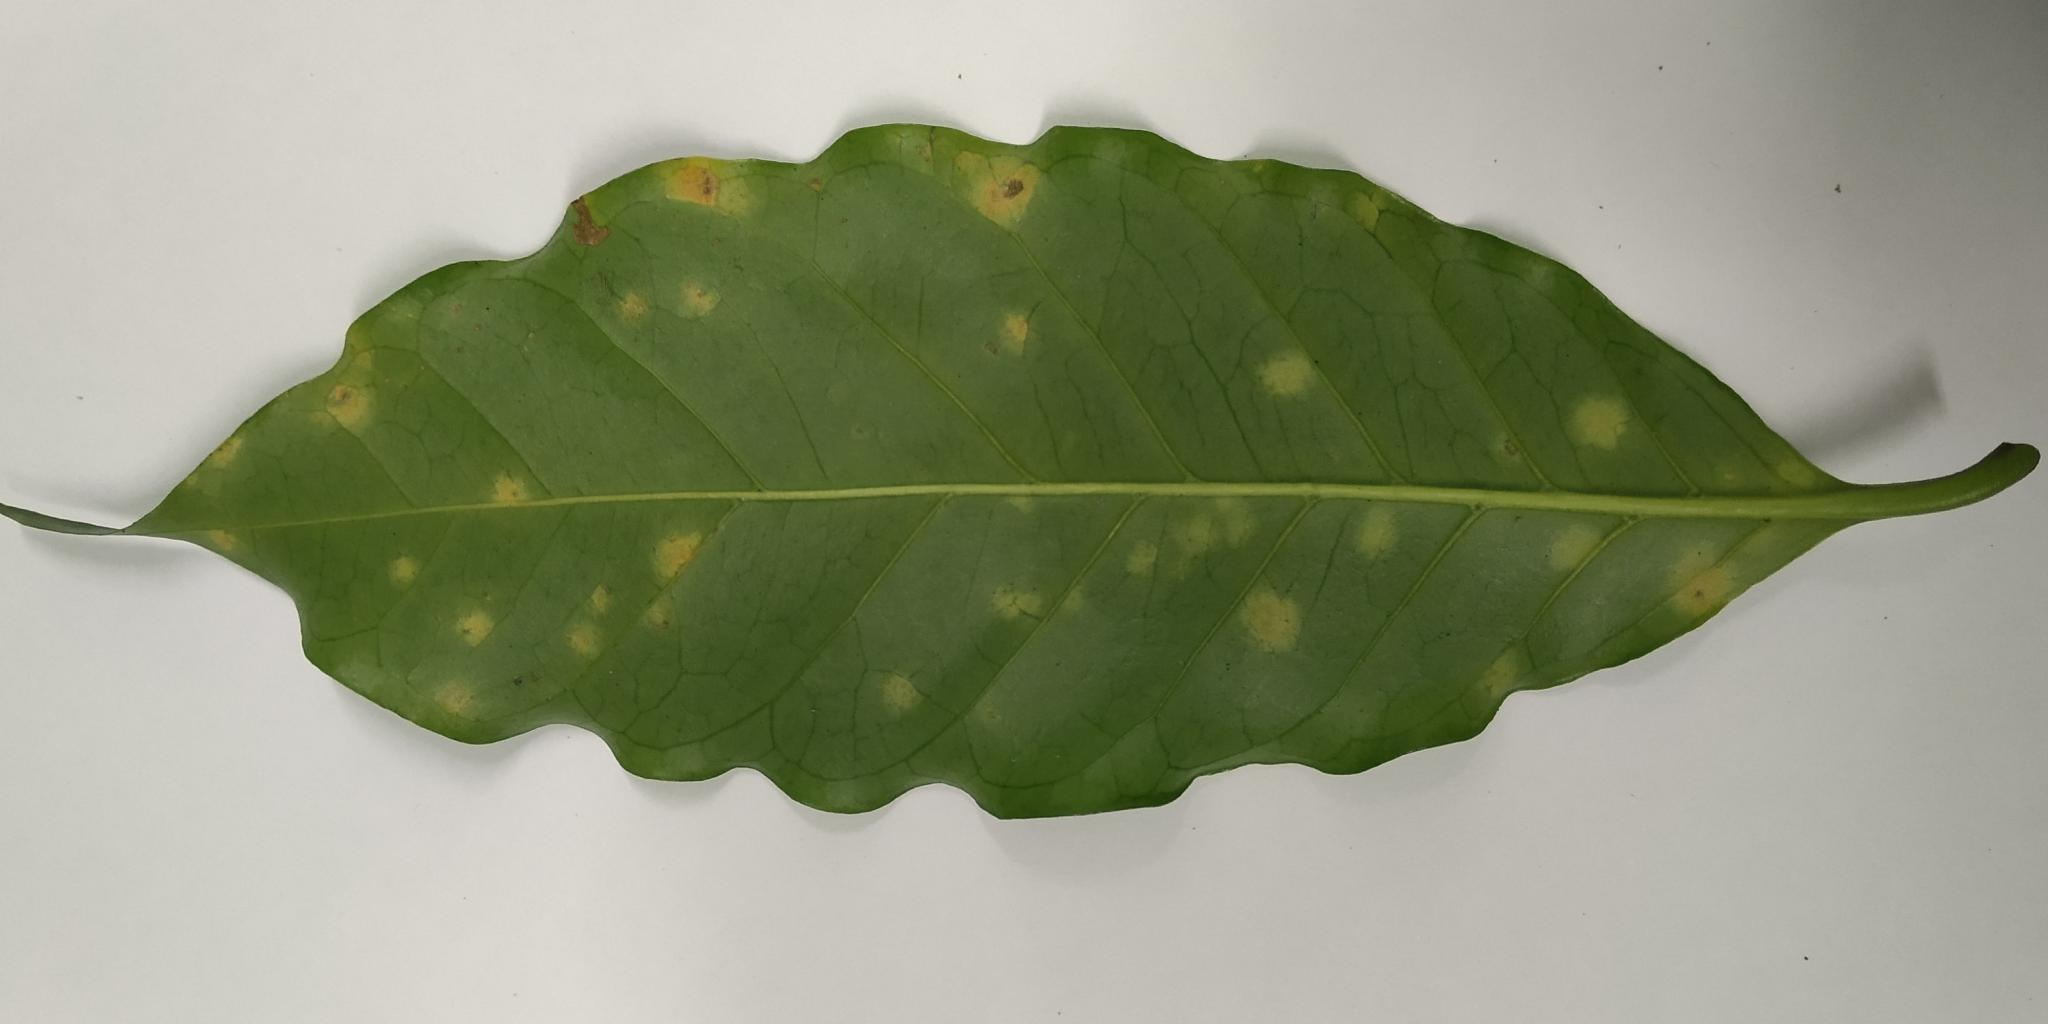

In [89]:
rust = list(data_dir.glob('rust/*'))
print(rust[0])
PIL.Image.open(str(rust[0]))

In [90]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1180 files belonging to 3 classes.
Using 944 files for training.


In [91]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1180 files belonging to 3 classes.
Using 236 files for validation.


In [92]:

class_names = train_ds.class_names
print(class_names)

['miner', 'nodisease', 'rust']


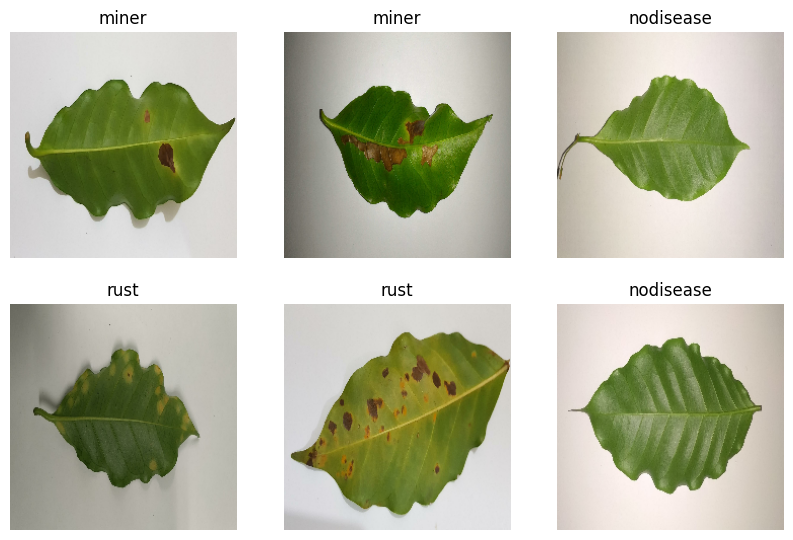

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


 **TREINAMENTO DO MODELO**

In [107]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [108]:
resnet_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_33 (ModuleW  (None, 2048)              0         
 rapper)                                                         
                                                                 
 module_wrapper_34 (ModuleW  (None, 512)               1049088   
 rapper)                                                         
                                                                 
 module_wrapper_35 (ModuleW  (None, 3)                 1539      
 rapper)                                                         
                                                                 
Total params: 24638339 (93.99 MB)
Trainable params: 1050627 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_______

In [109]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [110]:
epochs = 10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epochs
)

Epoch 1/10
30/30 [==============================] - 132s 4s/step - loss: 1.7303 - accuracy: 0.5286 - val_loss: 0.6667 - val_accuracy: 0.6441
Epoch 2/10
30/30 [==============================] - 11s 285ms/step - loss: 0.4343 - accuracy: 0.8411 - val_loss: 0.4590 - val_accuracy: 0.8220
Epoch 3/10
30/30 [==============================] - 11s 335ms/step - loss: 0.3007 - accuracy: 0.9047 - val_loss: 0.3662 - val_accuracy: 0.8686
Epoch 4/10
30/30 [==============================] - 10s 279ms/step - loss: 0.2233 - accuracy: 0.9354 - val_loss: 0.3355 - val_accuracy: 0.8729
Epoch 5/10
30/30 [==============================] - 11s 263ms/step - loss: 0.1801 - accuracy: 0.9470 - val_loss: 0.2841 - val_accuracy: 0.8941
Epoch 6/10
30/30 [==============================] - 12s 356ms/step - loss: 0.1255 - accuracy: 0.9703 - val_loss: 0.2591 - val_accuracy: 0.9025
Epoch 7/10
30/30 [==============================] - 10s 272ms/step - loss: 0.0998 - accuracy: 0.9735 - val_loss: 0.2320 - val_accuracy: 0.9195
E

**Avaliação**

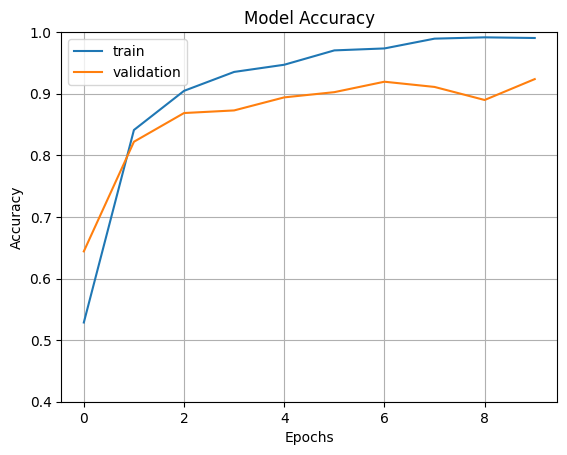

In [111]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

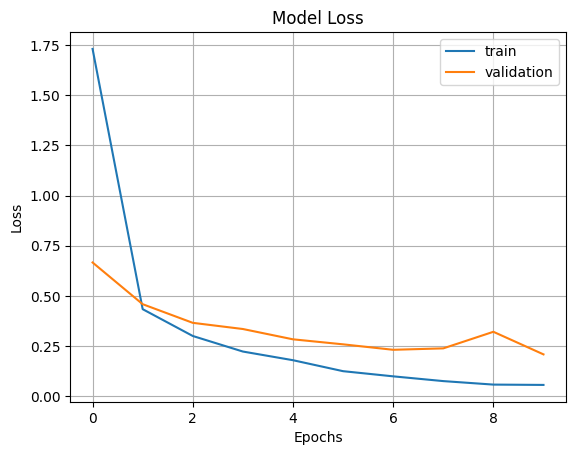

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()